In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('data/dengue_dataset.csv')

In [3]:
data.head()

,Temperature,Platelet_Count,White_Blood_Cell_Count,Body_Pain,Rash,Gender,Infected
0,98.249080,138060.514266,6854.650578,0,0,Female,False
1,99.401429,102193.912651,7347.397486,1,0,Female,False
2,98.963988,141755.585100,6011.997182,0,1,Male,False
3,98.697317,168269.474640,6852.807249,1,0,Male,True
4,97.812037,160752.598059,6800.937446,1,0,Female,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             5000 non-null   float64
 1   Platelet_Count          5000 non-null   float64
 2   White_Blood_Cell_Count  5000 non-null   float64
 3   Body_Pain               5000 non-null   int64  
 4   Rash                    5000 non-null   int64  
 5   Gender                  5000 non-null   object 
 6   Infected                5000 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 239.4+ KB


In [5]:
print(data.isnull().sum())


Temperature               0
Platelet_Count            0
White_Blood_Cell_Count    0
Body_Pain                 0
Rash                      0
Gender                    0
Infected                  0
dtype: int64


In [6]:
value_counts = data['Gender'].astype(str).value_counts(dropna=False)

print(value_counts)

Gender
Male      2031
Female    1997
Other      972
Name: count, dtype: int64


In [7]:
def encode_gender(value):
    return 0 if value == 'Female' else 1

data['Gender'] = data['Gender'].apply(encode_gender)

In [8]:
numerical_features = ['Temperature', 'Platelet_Count',
                       'White_Blood_Cell_Count', 'Body_Pain',
                         'Rash', 'Gender']
target = 'Infected'

In [9]:
X = data[numerical_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [12]:
y_pred = gnb.predict(X_test_scaled)
print("\nAkurasi model:", accuracy_score(y_test, y_pred))
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi model: 0.805

Laporan klasifikasi:
              precision    recall  f1-score   support

       False       0.88      0.85      0.86       736
        True       0.62      0.69      0.65       264

    accuracy                           0.81      1000
   macro avg       0.75      0.77      0.76      1000
weighted avg       0.81      0.81      0.81      1000



In [13]:
input_data = pd.DataFrame([{
    'Temperature': 97,
    'Platelet_Count': 168269.474640,
    'White_Blood_Cell_Count': 6852.807249,
    'Body_Pain': 1,
    'Rash': 0,
    'Gender': 'Male'
}])

input_data['Gender'] = input_data['Gender'].apply(encode_gender)
input_data_scaled = scaler.transform(input_data)
new_prediction = gnb.predict(input_data_scaled)
print("\nPrediksi untuk data baru:", new_prediction[0])


Prediksi untuk data baru: True


In [14]:
import pickle

# Simpan model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(gnb, model_file)

# Simpan scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


===== Sebelum Penanganan Outlier =====
Jumlah outlier pada Temperature sebelum: 0
Jumlah outlier pada Platelet_Count sebelum: 42
Jumlah outlier pada White_Blood_Cell_Count sebelum: 41


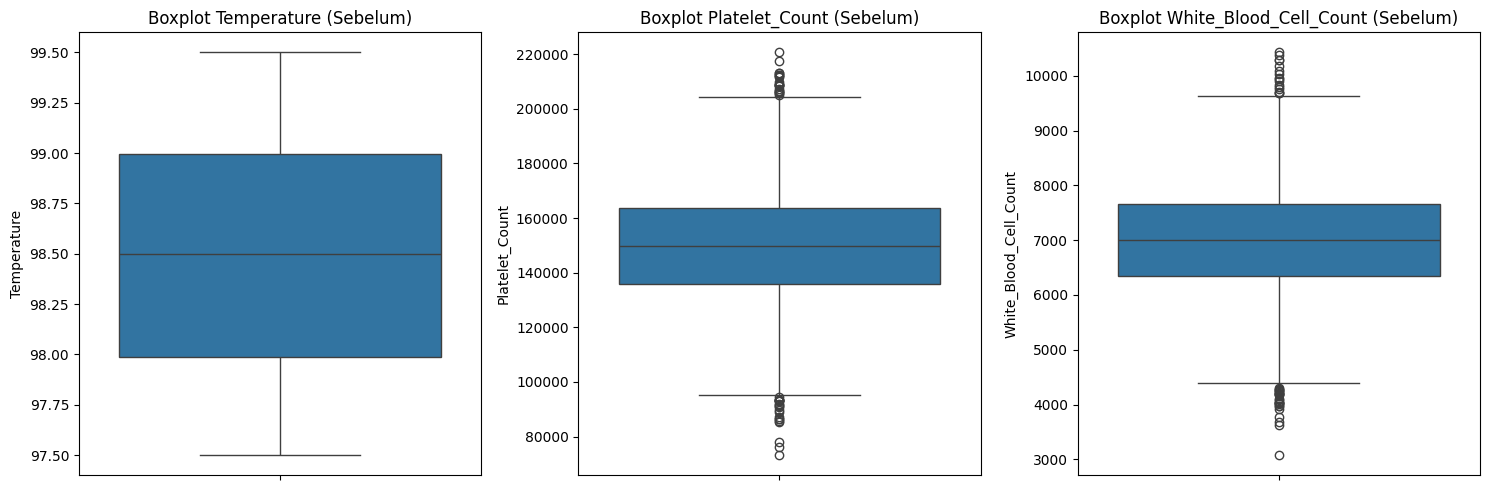


===== Setelah Penanganan Outlier =====
Jumlah outlier pada Temperature setelah: 0
Jumlah outlier pada Platelet_Count setelah: 0
Jumlah outlier pada White_Blood_Cell_Count setelah: 0


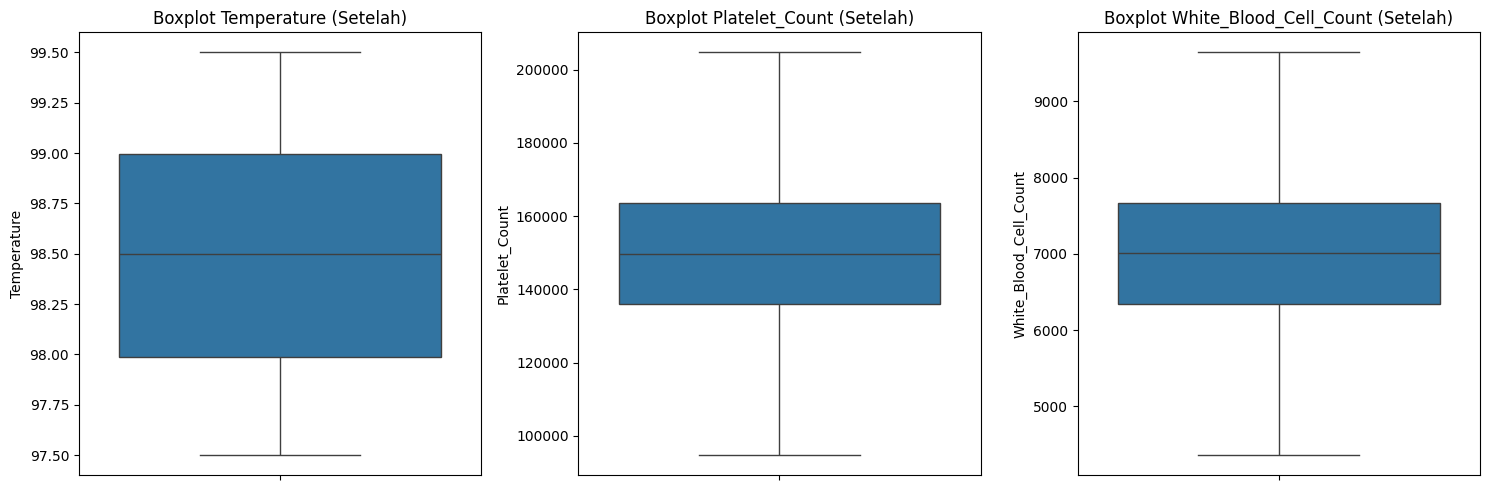


Prediksi untuk input data baru: True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             5000 non-null   float64
 1   Platelet_Count          5000 non-null   float64
 2   White_Blood_Cell_Count  5000 non-null   float64
 3   Body_Pain               5000 non-null   int64  
 4   Rash                    5000 non-null   int64  
 5   Gender                  5000 non-null   int64  
 6   Infected                5000 non-null   bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 239.4 KB


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# ======= Load Dataset =======
datasets = pd.read_csv('dengue_dataset.csv')

# ======= Fungsi Menghitung Jumlah Outlier =======
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# ======= EDA Sebelum Penanganan Outlier =======
print("===== Sebelum Penanganan Outlier =====")
numerical_features = ['Temperature', 'Platelet_Count', 'White_Blood_Cell_Count']

# Hitung jumlah outlier sebelum penanganan
for feature in numerical_features:
    num_outliers = count_outliers_iqr(datasets, feature)
    print(f"Jumlah outlier pada {feature} sebelum: {num_outliers}")

# Boxplot untuk fitur numerik sebelum
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=datasets[feature])
    plt.title(f"Boxplot {feature} (Sebelum)")
plt.tight_layout()
plt.show()

# ======= Penanganan Outlier dengan Winsorization =======
def winsorize_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Terapkan Winsorization pada semua fitur numerik
for feature in numerical_features:
    datasets = winsorize_outliers(datasets, feature)

# ======= EDA Setelah Penanganan Outlier =======
print("\n===== Setelah Penanganan Outlier =====")

# Hitung jumlah outlier setelah penanganan
for feature in numerical_features:
    num_outliers = count_outliers_iqr(datasets, feature)
    print(f"Jumlah outlier pada {feature} setelah: {num_outliers}")

# Boxplot untuk fitur numerik setelah Winsorization
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=datasets[feature])
    plt.title(f"Boxplot {feature} (Setelah)")
plt.tight_layout()
plt.show()

# ======= Preprocessing =======

# Encode kolom kategorikal Gender
datasets['Gender'] = datasets['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

# Definisikan fitur numerik dan target
numerical_features = ['Temperature', 'Platelet_Count', 'White_Blood_Cell_Count', 'Body_Pain', 'Rash', 'Gender']
X = datasets[numerical_features]
y = datasets['Infected']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======= Model Training =======

# Inisialisasi dan fit scaler dengan data pelatihan
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Latih model Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# ======= Prediksi Data Baru =======

# Data input baru
input_data = pd.DataFrame([{
    'Temperature': 98.697317,
    'Platelet_Count': 168269.474640,
    'White_Blood_Cell_Count': 6852.807249,
    'Body_Pain': 1,
    'Rash': 0,
    'Gender': 'Male'
}])

# Langkah 1: Encoding fitur kategorikal
input_data['Gender'] = input_data['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

# Langkah 2: Pilih hanya kolom fitur numerik
input_data = input_data[numerical_features]

# Langkah 3: Gunakan scaler yang sudah di-fit
input_data_scaled = scaler.transform(input_data)

# Langkah 4: Prediksi
numerical_prediction = gnb.predict(input_data_scaled)

print("\nPrediksi untuk input data baru:", numerical_prediction[0])

datasets.info()